In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('creditcard.csv')

In [18]:
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Amount'] >= lower_bound) & (data['Amount'] <= upper_bound)]
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252903 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    252903 non-null  float64
 1   V1      252903 non-null  float64
 2   V2      252903 non-null  float64
 3   V3      252903 non-null  float64
 4   V4      252903 non-null  float64
 5   V5      252903 non-null  float64
 6   V6      252903 non-null  float64
 7   V7      252903 non-null  float64
 8   V8      252903 non-null  float64
 9   V9      252903 non-null  float64
 10  V10     252903 non-null  float64
 11  V11     252903 non-null  float64
 12  V12     252903 non-null  float64
 13  V13     252903 non-null  float64
 14  V14     252903 non-null  float64
 15  V15     252903 non-null  float64
 16  V16     252903 non-null  float64
 17  V17     252903 non-null  float64
 18  V18     252903 non-null  float64
 19  V19     252903 non-null  float64
 20  V20     252903 non-null  float64
 21  V21     25

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


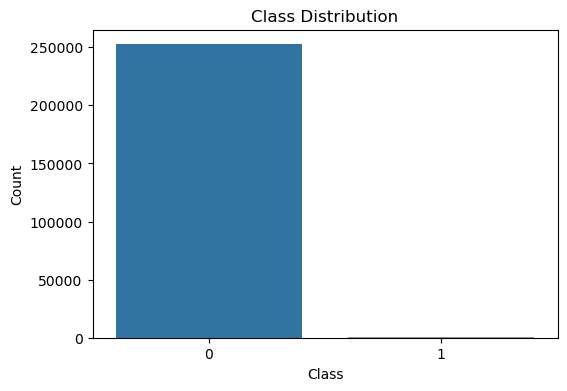

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data['Class'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

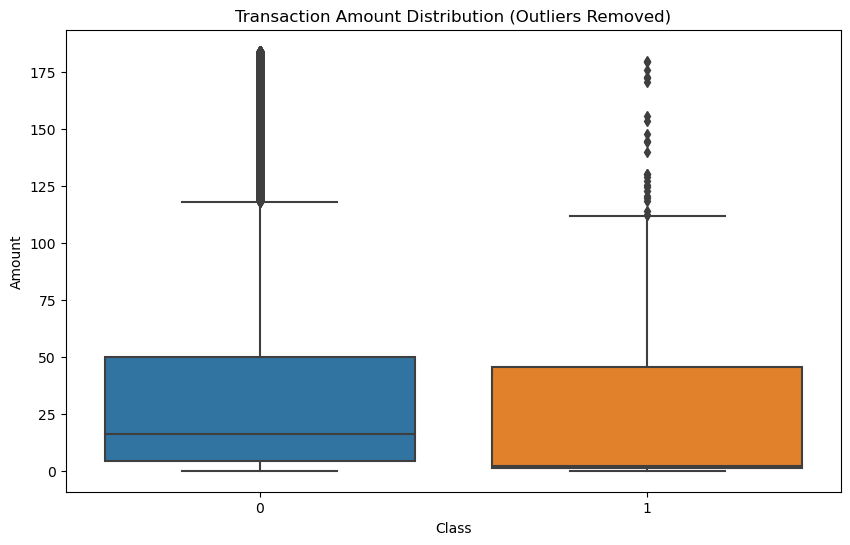

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amount Distribution (Outliers Removed)')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()


C:\Users\singh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


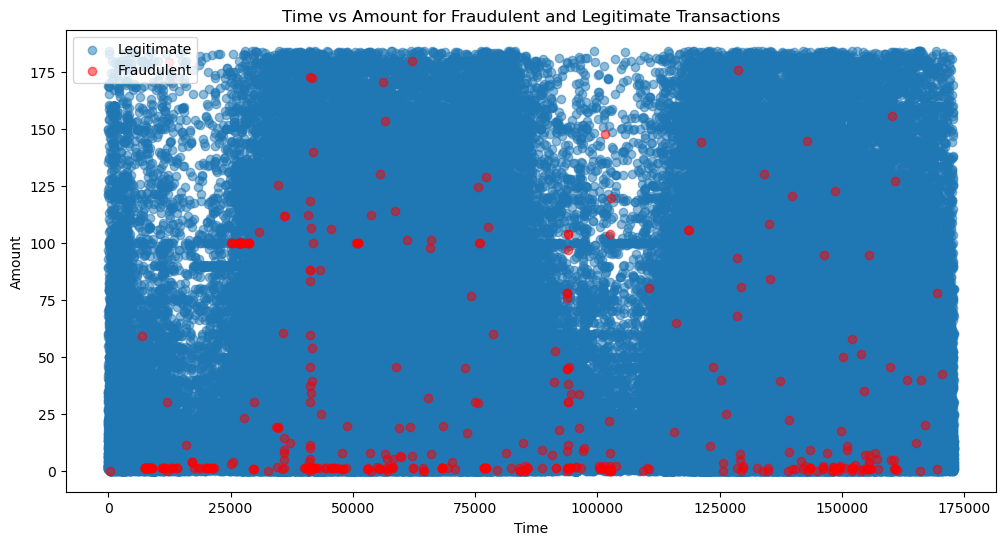

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(data[data['Class'] == 0]['Time'], data[data['Class'] == 0]['Amount'], label='Legitimate', alpha=0.5)
plt.scatter(data[data['Class'] == 1]['Time'], data[data['Class'] == 1]['Amount'], label='Fraudulent', alpha=0.5, color='red')
plt.title('Time vs Amount for Fraudulent and Legitimate Transactions')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()


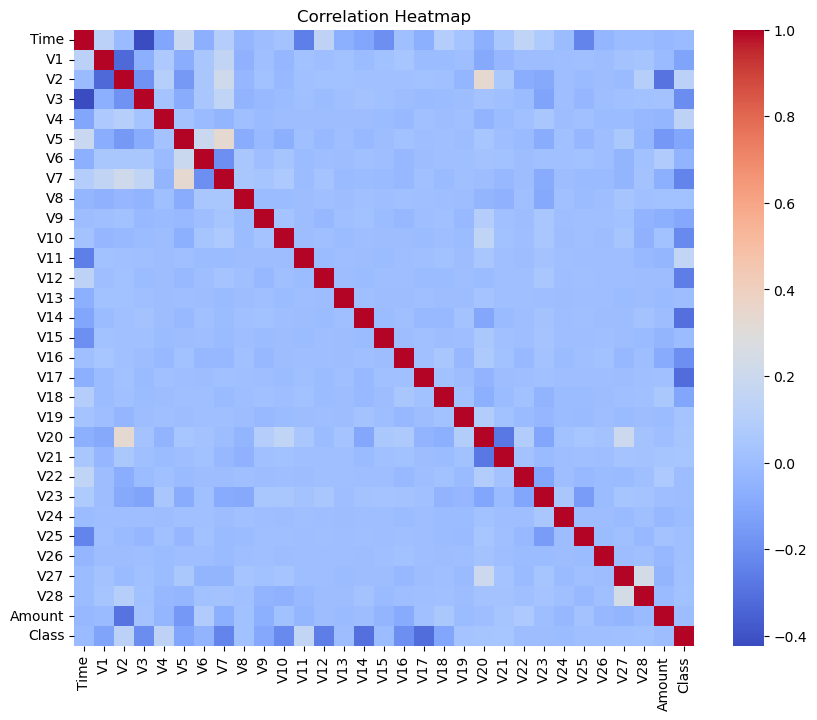

In [22]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


In [23]:
correlation_with_class = data.corr()['Class'].abs()
correlation_threshold = 0.1


In [24]:
low_correlation_features = correlation_with_class[correlation_with_class < correlation_threshold].index
data = data.drop(columns=low_correlation_features)

In [25]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252903 entries, 0 to 284805
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      252903 non-null  float64
 1   V2      252903 non-null  float64
 2   V3      252903 non-null  float64
 3   V4      252903 non-null  float64
 4   V5      252903 non-null  float64
 5   V7      252903 non-null  float64
 6   V9      252903 non-null  float64
 7   V10     252903 non-null  float64
 8   V11     252903 non-null  float64
 9   V12     252903 non-null  float64
 10  V14     252903 non-null  float64
 11  V16     252903 non-null  float64
 12  V17     252903 non-null  float64
 13  V18     252903 non-null  float64
 14  Class   252903 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 30.9 MB
None
                  V1             V2             V3             V4  \
count  252903.000000  252903.000000  252903.000000  252903.000000   
mean        0.094504       0.230435       0.0606

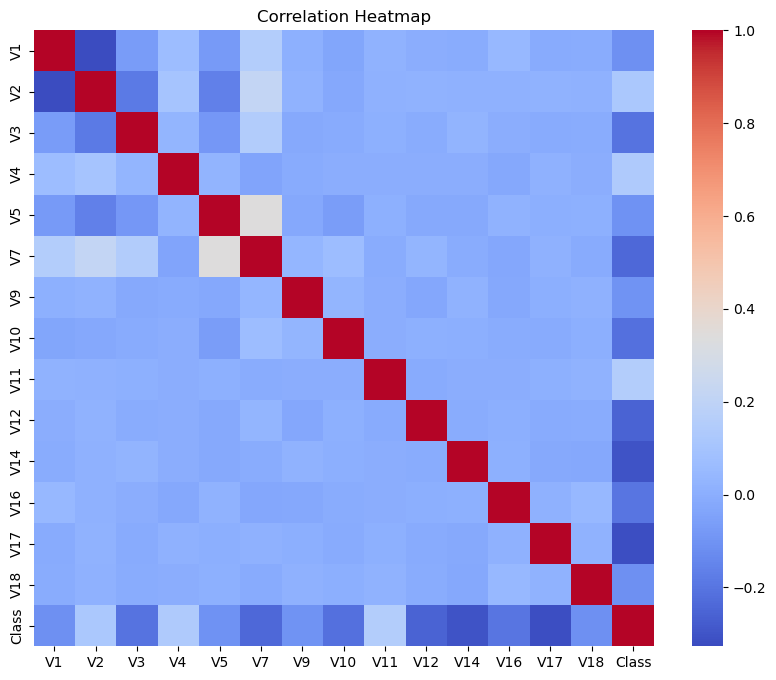

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

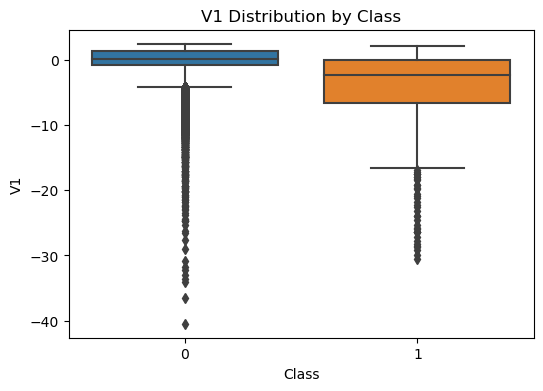

Test for V1: t-statistic = 57.1027076667912, p-value = 0.0


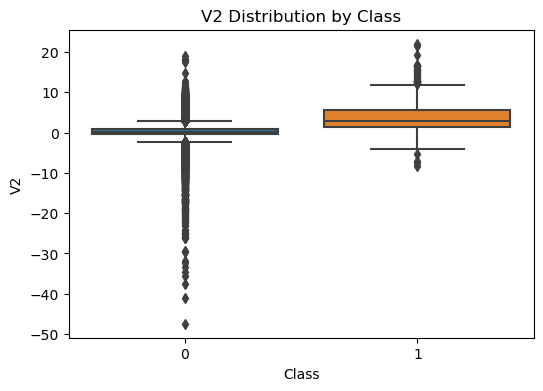

Test for V2: t-statistic = -62.11020989529103, p-value = 0.0


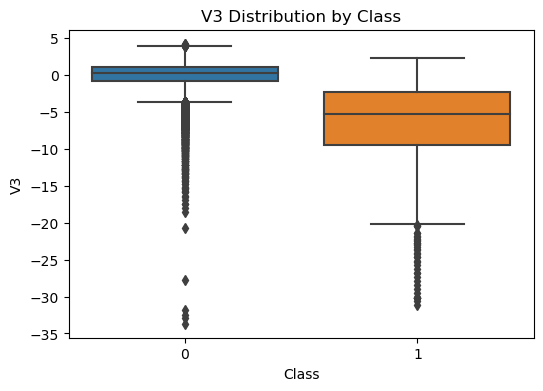

Test for V3: t-statistic = 105.26574725183183, p-value = 0.0


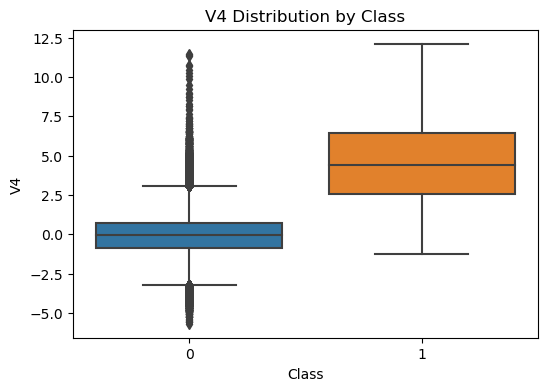

Test for V4: t-statistic = -69.48178619451353, p-value = 0.0


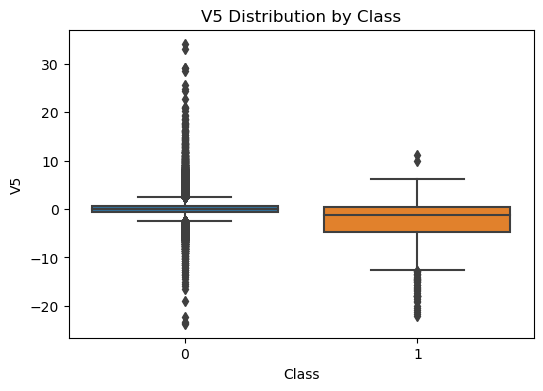

Test for V5: t-statistic = 54.42890746147483, p-value = 0.0


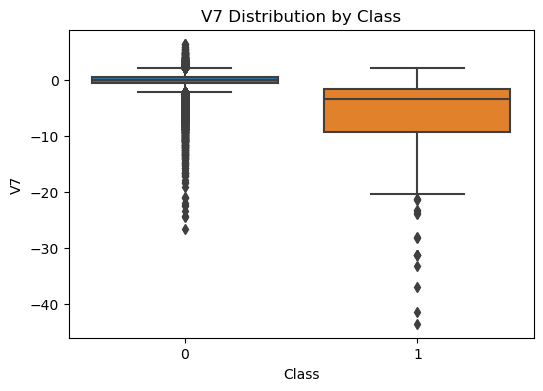

Test for V7: t-statistic = 123.61033350877959, p-value = 0.0


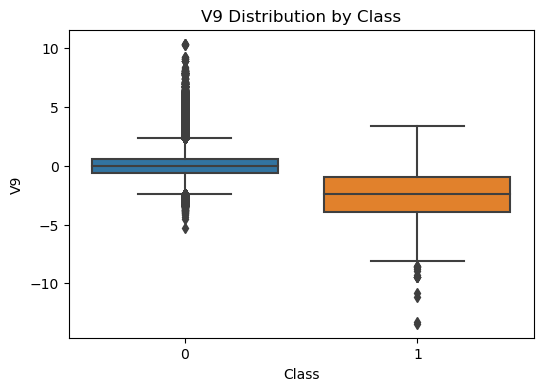

Test for V9: t-statistic = 50.78505465929517, p-value = 0.0


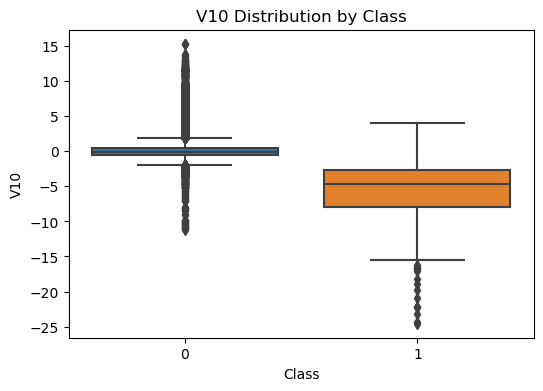

Test for V10: t-statistic = 111.85351880475288, p-value = 0.0


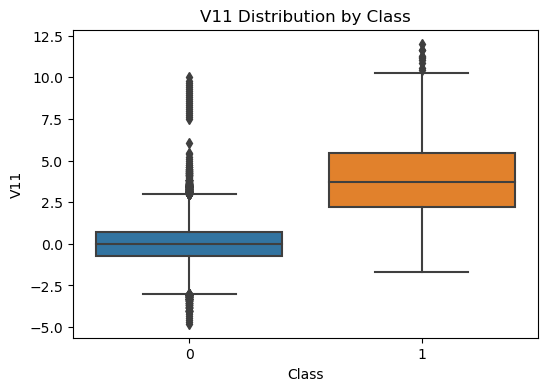

Test for V11: t-statistic = -79.01740910668391, p-value = 0.0


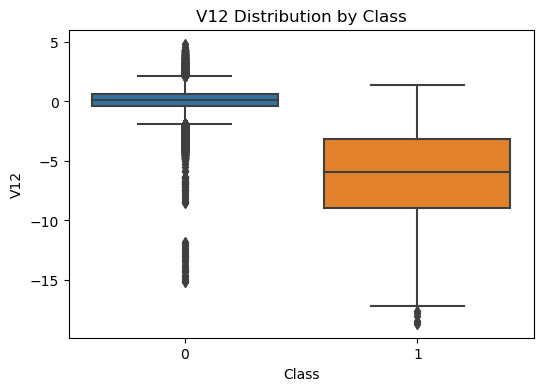

Test for V12: t-statistic = 134.56884787000195, p-value = 0.0


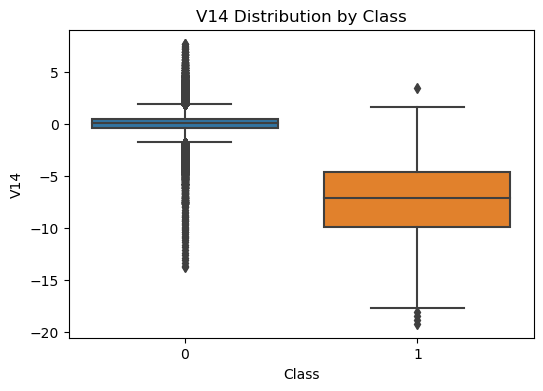

Test for V14: t-statistic = 159.35337138536713, p-value = 0.0


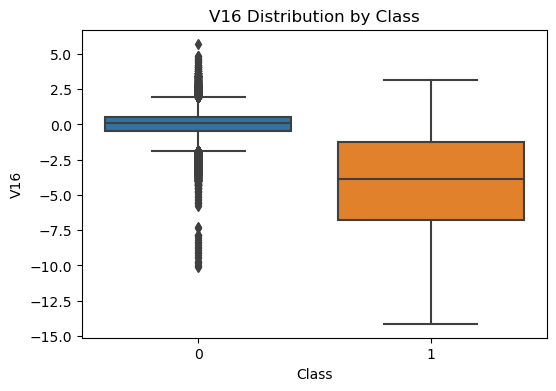

Test for V16: t-statistic = 102.33108778461379, p-value = 0.0


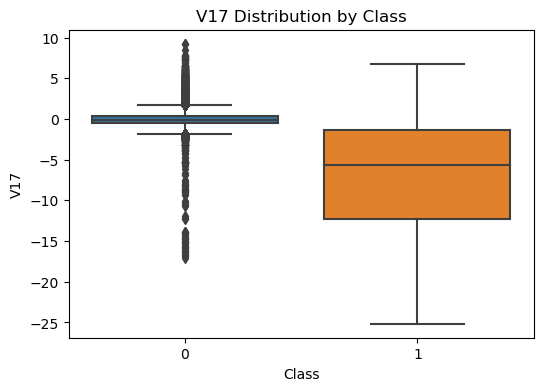

Test for V17: t-statistic = 168.05393844925732, p-value = 0.0


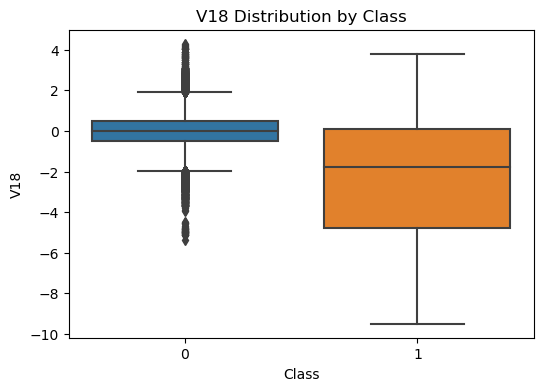

Test for V18: t-statistic = 56.16635135504417, p-value = 0.0


In [28]:
from scipy.stats import ttest_ind
for feature in data.columns:
    if feature != 'Class':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='Class', y=feature, data=data)
        plt.title(f'{feature} Distribution by Class')
        plt.xlabel('Class')
        plt.ylabel(feature)
        plt.show()

        # Conduct t-test to compare means of the feature for each Class
        legit_vals = data[data['Class'] == 0][feature]
        fraud_vals = data[data['Class'] == 1][feature]
        t_statistic, p_value = ttest_ind(legit_vals, fraud_vals)
        print(f'Test for {feature}: t-statistic = {t_statistic}, p-value = {p_value}')

In [29]:
X = data.drop(columns=['Class'])
y = data['Class']
threshold = 0.5
total_scores = X.sum(axis=1)

In [30]:
predictions = total_scores > threshold

In [31]:
binary_predictions = predictions.astype(int)

In [32]:
accuracy = np.mean(binary_predictions == y)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.45


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [39]:
y_pred = model.predict(X_test_scaled)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.83      0.64      0.72        91

    accuracy                           1.00     50581
   macro avg       0.91      0.82      0.86     50581
weighted avg       1.00      1.00      1.00     50581

